In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_main = pd.read_csv("int20h_processed.csv")

In [3]:
df_main[df_main["event_Subscription Premium"] == 0]

,first_to_last_event_hours,event_Account History Transaction Details,event_Account Setup Profile Skip,event_Account Setup Skip,event_Add Payment Method Failed,event_Calculator Used,event_Calculator View,event_Chat Conversation Started,event_Email Confirmation Success,event_NonPremium_order,...,samsung,signed_up_before2022,sign_up_Apple,sign_up_Email,sign_up_Facebook,sign_up_Google,no_card_added,didnt_try_adding_vehicle,gave_up_adding_vehicle,subscribed_for_1_month_only


As we can see, the resulting dataframe only contains record of users who have subscribed to the premium subscription, so this column is redundant and we can drop it.

In [4]:
df_main.drop("event_Subscription Premium", axis = 1, inplace = True)

## Correlation

<AxesSubplot: >

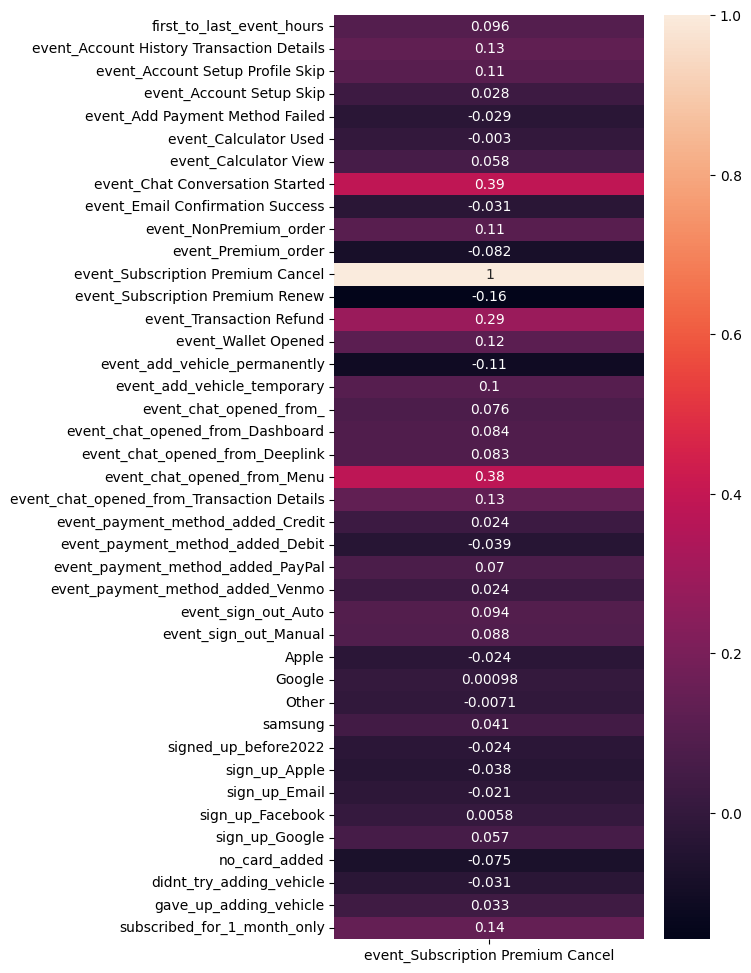

In [5]:
fig, ax = plt.subplots(figsize=(5,12))         # Sample figsize in inches
sns.heatmap(df_main.corr()[['event_Subscription Premium Cancel']], annot=True)

In [6]:
df_main.corr()[['event_Subscription Premium Cancel']].sort_values(
    by='event_Subscription Premium Cancel', 
    key = lambda x: abs(x), ascending=False).head(6)

,event_Subscription Premium Cancel
event_Subscription Premium Cancel,1.000000
event_Chat Conversation Started,0.389136
event_chat_opened_from_Menu,0.380628
event_Transaction Refund,0.286894
event_Subscription Premium Renew,-0.158162
subscribed_for_1_month_only,0.142761


In [7]:
df_main.corr()[['event_Subscription Premium Cancel']].sort_values(by='event_Subscription Premium Cancel', key = lambda x: abs(x)).head()

,event_Subscription Premium Cancel
Google,0.000983
event_Calculator Used,-0.003015
sign_up_Facebook,0.005796
Other,-0.007065
sign_up_Email,-0.020799


## Mutual Information

In [8]:
X = df_main.drop('event_Subscription Premium Cancel', axis = 1)
y = df_main['event_Subscription Premium Cancel']
discrete_features = X.dtypes == int

mi_scores = mutual_info_regression(
    X, 
    y, 
    discrete_features = discrete_features)

mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores.head()

event_Chat Conversation Started    0.159107
event_chat_opened_from_Menu        0.136967
event_Add Payment Method Failed    0.124232
first_to_last_event_hours          0.104123
event_Wallet Opened                0.091066
Name: MI Scores, dtype: float64

<AxesSubplot: xlabel='first_to_last_event_hours', ylabel='Density'>

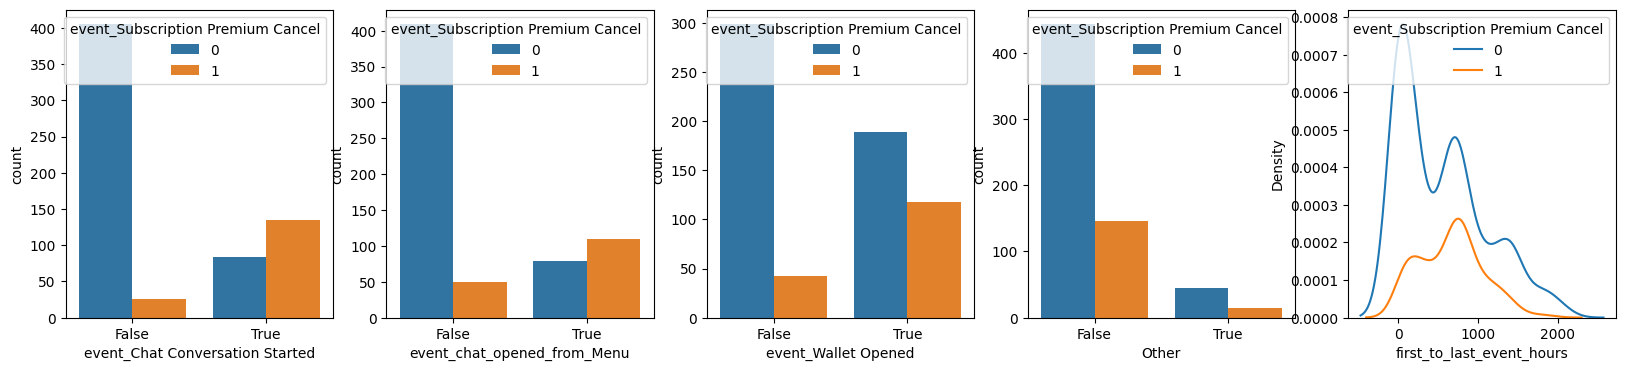

In [17]:
fig, axs = plt.subplots(1, 5, figsize=(20,4))
feat_list = [
    'event_Chat Conversation Started', 'event_chat_opened_from_Menu', 
    'event_Wallet Opened', 'Other']

for i in range(4):
    sns.countplot(x=X[feat_list[i]] > 0, hue=y, ax=axs[i])

sns.kdeplot(x=X["first_to_last_event_hours"], hue=y, ax=axs[4])

In [ ]:
mi_scores.sort_values().head()

subscribed_for_1_month_only    0.0
no_card_added                  0.0
sign_up_Facebook               0.0
didnt_try_adding_vehicle       0.0
sign_up_Email                  0.0
Name: MI Scores, dtype: float64

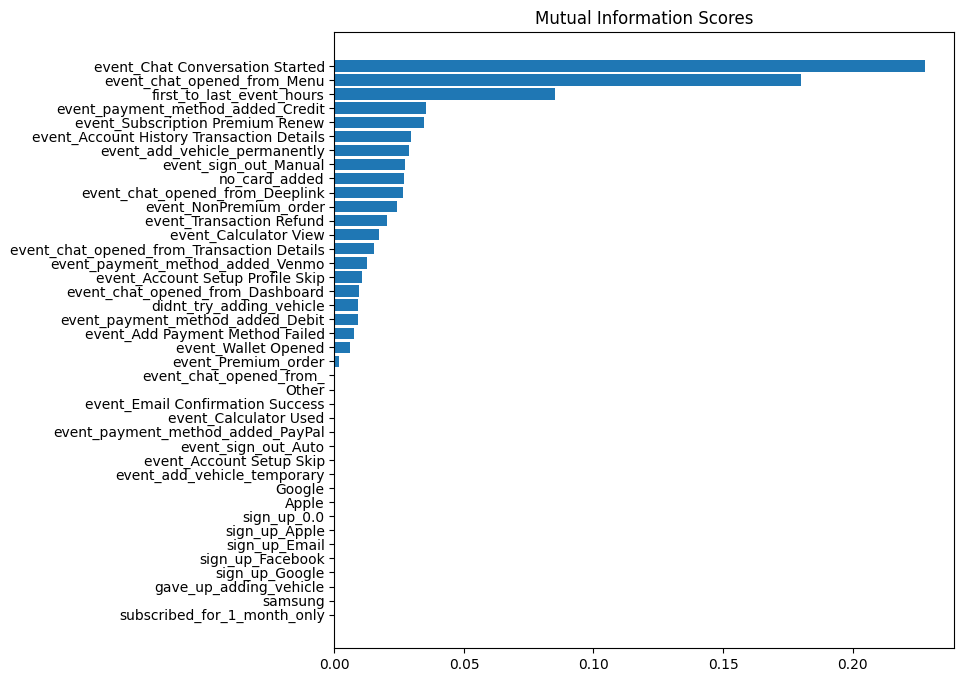

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)

## Random Forest (Feature Importances)

In [ ]:
X = df_main.drop('event_Subscription Premium Cancel', axis=1)
y = df_main['event_Subscription Premium Cancel']
rf = RandomForestClassifier().fit(X,y)

In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)
feat_imp.sort_values(ascending=False).head()

event_Chat Conversation Started    0.218498
event_chat_opened_from_Menu        0.111896
first_to_last_event_hours          0.106566
event_Wallet Opened                0.065448
event_Transaction Refund           0.056374
dtype: float64

<AxesSubplot: xlabel='first_to_last_event_hours', ylabel='Density'>

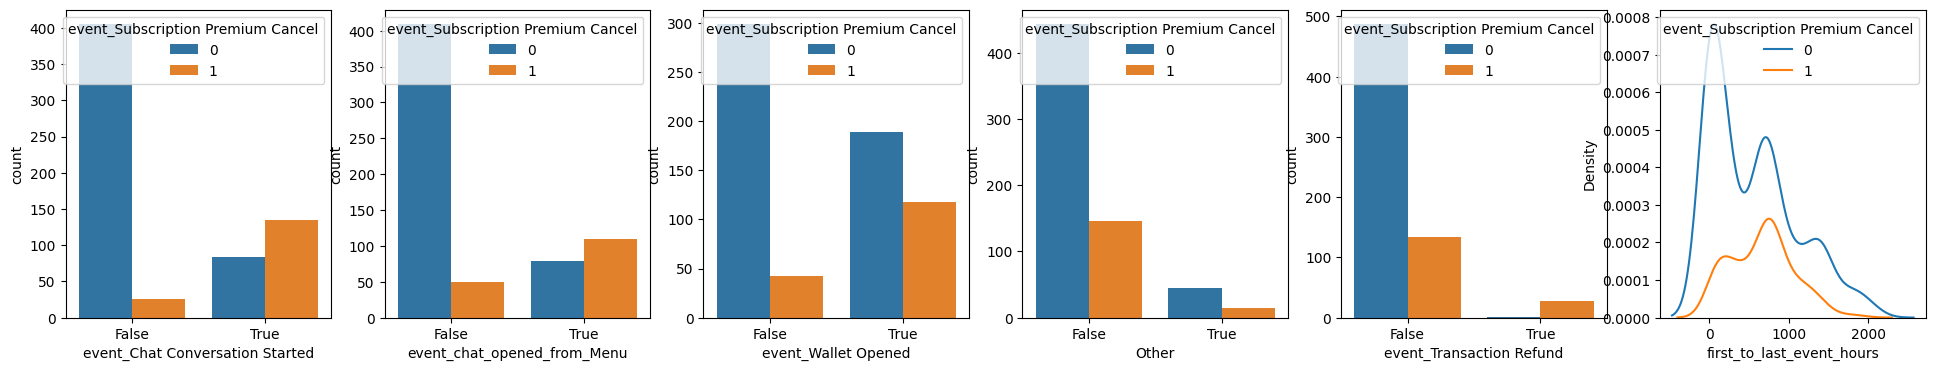

In [21]:
fig, axs = plt.subplots(1, 6, figsize=(24,4))
feat_list = [
    'event_Chat Conversation Started', 'event_chat_opened_from_Menu', 
    'event_Wallet Opened', 'Other', 'event_Transaction Refund']

for i in range(5):
    sns.countplot(x=X[feat_list[i]] > 0, hue=y, ax=axs[i])

# sns.countplot(x=X[feat_list[4]], hue=y, ax=axs[4])
sns.kdeplot(x=X["first_to_last_event_hours"], hue=y, ax=axs[5])

In [ ]:
feat_imp.sort_values().head()

no_card_added                       0.000665
didnt_try_adding_vehicle            0.001970
Google                              0.002007
event_payment_method_added_Venmo    0.003294
event_Account Setup Skip            0.003470
dtype: float64